In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from keras.models import load_model


In [2]:
df = pd.read_csv("/Users/aayushrangra/Desktop/SolarForecasting/SolarRadiationDataNewDelhicsv.csv")
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,New Delhi,2023-01-01T00:00:00,11.0,11.0,10.0,93.55,0.0,0,NaN,0,...,1020.0,0.0,2.0,0,0.0,0,10,Clear,clear-night,"VIDP,42181099999"
1,New Delhi,2023-01-01T01:00:00,10.0,9.6,9.0,93.50,0.0,0,NaN,0,...,1020.0,0.0,2.0,0,0.0,0,10,Clear,clear-night,"VIDP,42181099999"
2,New Delhi,2023-01-01T02:00:00,8.6,8.6,7.6,93.83,0.0,0,NaN,0,...,1019.5,5.0,1.2,0,0.0,0,10,Clear,clear-night,"42182099999,VIDP,42181099999"
3,New Delhi,2023-01-01T03:00:00,10.0,10.0,9.0,93.50,0.0,0,NaN,0,...,1019.0,0.0,2.0,0,0.0,0,10,Clear,clear-night,"VIDP,42181099999"
4,New Delhi,2023-01-01T04:00:00,9.0,8.5,9.0,100.00,0.0,0,NaN,0,...,1019.0,0.0,1.0,0,0.0,0,10,Clear,clear-night,"VIDP,42181099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,new delhi,2024-03-12T19:00:00,25.0,25.0,12.0,44.28,0.0,0,NaN,0,...,1014.0,0.0,4.0,41,0.1,0,10,Clear,clear-night,"VIDP,42181099999"
10484,new delhi,2024-03-12T20:00:00,22.8,22.8,13.9,57.44,0.0,0,NaN,0,...,1013.1,0.0,2.3,0,0.0,0,10,Clear,clear-night,"42182099999,VIDP,42181099999"
10485,new delhi,2024-03-12T21:00:00,23.0,23.0,14.0,56.90,0.0,0,NaN,0,...,1015.0,0.0,4.0,0,0.0,0,10,Clear,clear-night,"VIDP,42181099999"
10486,new delhi,2024-03-12T22:00:00,23.0,23.0,13.0,53.32,0.0,0,NaN,0,...,1015.0,0.0,4.0,0,0.0,0,10,Clear,clear-night,"VIDP,42181099999"


In [3]:
print(df.columns)

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')


In [4]:
columns_to_drop = ['conditions','icon', 'stations','uvindex', 'severerisk','precip',
       'precipprob', 'preciptype', 'snow','temp', 'feelslike', 'snowdepth','humidity','name']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df[::3]

,datetime,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,2023-01-01T00:00:00,10.0,10.8,5.4,250.0,1020.0,0.0,2.0,0,0.0
3,2023-01-01T03:00:00,9.0,12.2,0.0,0.0,1019.0,0.0,2.0,0,0.0
6,2023-01-01T06:00:00,9.0,5.0,5.4,300.0,1020.0,0.0,1.0,0,0.0
9,2023-01-01T09:00:00,10.0,4.3,5.4,250.0,1022.0,0.0,1.0,73,0.3
12,2023-01-01T12:00:00,11.0,3.2,7.6,270.0,1022.0,0.0,2.0,529,1.9
...,...,...,...,...,...,...,...,...,...,...
10473,2024-03-12T09:00:00,11.0,8.3,9.4,300.0,1017.0,27.2,2.0,138,0.5
10476,2024-03-12T12:00:00,9.0,12.6,11.2,280.0,1016.0,0.0,4.0,765,2.8
10479,2024-03-12T15:00:00,6.0,18.4,13.0,300.0,1014.0,0.0,5.0,767,2.8
10482,2024-03-12T18:00:00,9.0,18.0,11.2,300.0,1013.0,0.0,4.0,226,0.8


In [6]:
df[1::5]

,datetime,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
1,2023-01-01T01:00:00,9.0,11.2,5.4,250.0,1020.0,0.0,2.0,0,0.0
6,2023-01-01T06:00:00,9.0,5.0,5.4,300.0,1020.0,0.0,1.0,0,0.0
11,2023-01-01T11:00:00,10.7,2.2,8.0,250.0,1022.5,0.0,1.9,409,1.5
16,2023-01-01T16:00:00,9.0,4.0,5.4,270.0,1020.0,50.0,2.0,315,1.1
21,2023-01-01T21:00:00,9.0,7.2,0.0,0.0,1021.0,27.2,2.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
10466,2024-03-12T02:00:00,13.2,10.4,1.0,56.0,1014.7,12.3,2.2,0,0.0
10471,2024-03-12T07:00:00,12.0,9.4,7.6,250.0,1016.0,50.0,1.0,0,0.0
10476,2024-03-12T12:00:00,9.0,12.6,11.2,280.0,1016.0,0.0,4.0,765,2.8
10481,2024-03-12T17:00:00,10.4,18.0,6.1,282.0,1012.0,0.0,4.1,441,1.6


In [7]:
df.columns

Index(['datetime', 'dew', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy'],
      dtype='object')

In [8]:
df.insert(0, 'Datetime', pd.Series([float('nan')] * len(df)))

In [9]:
df['Datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%dT%H:%M:%S')

In [10]:
df

,Datetime,datetime,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,2023-01-01 00:00:00,2023-01-01T00:00:00,10.0,10.8,5.4,250.0,1020.0,0.0,2.0,0,0.0
1,2023-01-01 01:00:00,2023-01-01T01:00:00,9.0,11.2,5.4,250.0,1020.0,0.0,2.0,0,0.0
2,2023-01-01 02:00:00,2023-01-01T02:00:00,7.6,11.2,0.0,307.7,1019.5,5.0,1.2,0,0.0
3,2023-01-01 03:00:00,2023-01-01T03:00:00,9.0,12.2,0.0,0.0,1019.0,0.0,2.0,0,0.0
4,2023-01-01 04:00:00,2023-01-01T04:00:00,9.0,9.7,5.4,270.0,1019.0,0.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10483,2024-03-12 19:00:00,2024-03-12T19:00:00,12.0,20.9,7.6,310.0,1014.0,0.0,4.0,41,0.1
10484,2024-03-12 20:00:00,2024-03-12T20:00:00,13.9,20.2,5.1,232.0,1013.1,0.0,2.3,0,0.0
10485,2024-03-12 21:00:00,2024-03-12T21:00:00,14.0,21.6,9.4,330.0,1015.0,0.0,4.0,0,0.0
10486,2024-03-12 22:00:00,2024-03-12T22:00:00,13.0,22.7,7.6,340.0,1015.0,0.0,4.0,0,0.0


In [11]:
df['Datetime'].dt.strftime('%d-%m-%Y %H--00-00')

0        01-01-2023 00--00-00
1        01-01-2023 01--00-00
2        01-01-2023 02--00-00
3        01-01-2023 03--00-00
4        01-01-2023 04--00-00
                 ...         
10483    12-03-2024 19--00-00
10484    12-03-2024 20--00-00
10485    12-03-2024 21--00-00
10486    12-03-2024 22--00-00
10487    12-03-2024 23--00-00
Name: Datetime, Length: 10488, dtype: object

In [12]:
df

,Datetime,datetime,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
0,2023-01-01 00:00:00,2023-01-01T00:00:00,10.0,10.8,5.4,250.0,1020.0,0.0,2.0,0,0.0
1,2023-01-01 01:00:00,2023-01-01T01:00:00,9.0,11.2,5.4,250.0,1020.0,0.0,2.0,0,0.0
2,2023-01-01 02:00:00,2023-01-01T02:00:00,7.6,11.2,0.0,307.7,1019.5,5.0,1.2,0,0.0
3,2023-01-01 03:00:00,2023-01-01T03:00:00,9.0,12.2,0.0,0.0,1019.0,0.0,2.0,0,0.0
4,2023-01-01 04:00:00,2023-01-01T04:00:00,9.0,9.7,5.4,270.0,1019.0,0.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10483,2024-03-12 19:00:00,2024-03-12T19:00:00,12.0,20.9,7.6,310.0,1014.0,0.0,4.0,41,0.1
10484,2024-03-12 20:00:00,2024-03-12T20:00:00,13.9,20.2,5.1,232.0,1013.1,0.0,2.3,0,0.0
10485,2024-03-12 21:00:00,2024-03-12T21:00:00,14.0,21.6,9.4,330.0,1015.0,0.0,4.0,0,0.0
10486,2024-03-12 22:00:00,2024-03-12T22:00:00,13.0,22.7,7.6,340.0,1015.0,0.0,4.0,0,0.0


In [13]:
df.index = pd.to_datetime(df['Datetime'])

In [14]:
df

,Datetime,datetime,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
Datetime,,,,,,,,,,,
2023-01-01 00:00:00,2023-01-01 00:00:00,2023-01-01T00:00:00,10.0,10.8,5.4,250.0,1020.0,0.0,2.0,0,0.0
2023-01-01 01:00:00,2023-01-01 01:00:00,2023-01-01T01:00:00,9.0,11.2,5.4,250.0,1020.0,0.0,2.0,0,0.0
2023-01-01 02:00:00,2023-01-01 02:00:00,2023-01-01T02:00:00,7.6,11.2,0.0,307.7,1019.5,5.0,1.2,0,0.0
2023-01-01 03:00:00,2023-01-01 03:00:00,2023-01-01T03:00:00,9.0,12.2,0.0,0.0,1019.0,0.0,2.0,0,0.0
2023-01-01 04:00:00,2023-01-01 04:00:00,2023-01-01T04:00:00,9.0,9.7,5.4,270.0,1019.0,0.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-12 19:00:00,2024-03-12 19:00:00,2024-03-12T19:00:00,12.0,20.9,7.6,310.0,1014.0,0.0,4.0,41,0.1
2024-03-12 20:00:00,2024-03-12 20:00:00,2024-03-12T20:00:00,13.9,20.2,5.1,232.0,1013.1,0.0,2.3,0,0.0
2024-03-12 21:00:00,2024-03-12 21:00:00,2024-03-12T21:00:00,14.0,21.6,9.4,330.0,1015.0,0.0,4.0,0,0.0


In [15]:
df = df[~((df['Datetime'].dt.hour >= 0) & (df['Datetime'].dt.hour < 7) |
                  (df['Datetime'].dt.hour >= 19) & (df['Datetime'].dt.hour < 24))]

In [16]:
df.drop(columns = ['datetime', 'Datetime'], inplace = True)

/var/folders/8n/95vlvnl93lg2r18pnsrgf8f40000gn/T/ipykernel_34337/2306889241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['datetime', 'Datetime'], inplace = True)


In [17]:
df

,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy
Datetime,,,,,,,,,
2023-01-01 07:00:00,9.0,5.0,3.6,250.0,1020.0,27.2,1.0,0,0.0
2023-01-01 08:00:00,9.3,4.7,3.9,270.0,1021.8,37.5,1.0,1,0.0
2023-01-01 09:00:00,10.0,4.3,5.4,250.0,1022.0,0.0,1.0,73,0.3
2023-01-01 10:00:00,10.0,1.8,9.4,250.0,1023.0,0.0,2.0,209,0.8
2023-01-01 11:00:00,10.7,2.2,8.0,250.0,1022.5,0.0,1.9,409,1.5
...,...,...,...,...,...,...,...,...,...
2024-03-12 14:00:00,10.6,17.6,8.5,298.0,1012.9,0.0,4.1,837,3.0
2024-03-12 15:00:00,6.0,18.4,13.0,300.0,1014.0,0.0,5.0,767,2.8
2024-03-12 16:00:00,6.0,18.7,13.0,300.0,1013.0,0.0,5.0,630,2.3


<Axes: xlabel='Datetime'>

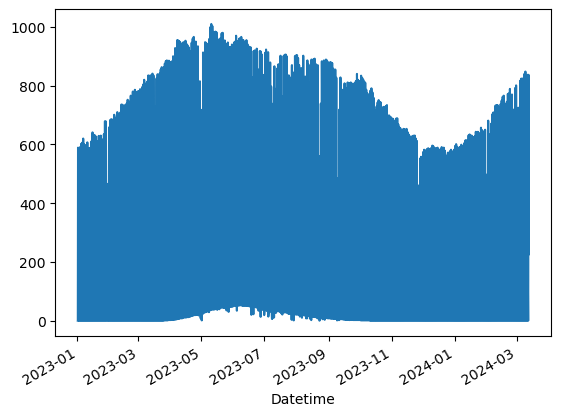

In [18]:
ghi = df['solarradiation']
ghi.plot()

In [19]:
df['solarradiation']

Datetime
2023-01-01 07:00:00      0
2023-01-01 08:00:00      1
2023-01-01 09:00:00     73
2023-01-01 10:00:00    209
2023-01-01 11:00:00    409
                      ... 
2024-03-12 14:00:00    837
2024-03-12 15:00:00    767
2024-03-12 16:00:00    630
2024-03-12 17:00:00    441
2024-03-12 18:00:00    226
Name: solarradiation, Length: 5244, dtype: int64

In [20]:
df['Seconds'] = df.index.map(pd.Timestamp.timestamp)
df

/var/folders/8n/95vlvnl93lg2r18pnsrgf8f40000gn/T/ipykernel_34337/3527561163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seconds'] = df.index.map(pd.Timestamp.timestamp)


,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,Seconds
Datetime,,,,,,,,,,
2023-01-01 07:00:00,9.0,5.0,3.6,250.0,1020.0,27.2,1.0,0,0.0,1.672556e+09
2023-01-01 08:00:00,9.3,4.7,3.9,270.0,1021.8,37.5,1.0,1,0.0,1.672560e+09
2023-01-01 09:00:00,10.0,4.3,5.4,250.0,1022.0,0.0,1.0,73,0.3,1.672564e+09
2023-01-01 10:00:00,10.0,1.8,9.4,250.0,1023.0,0.0,2.0,209,0.8,1.672567e+09
2023-01-01 11:00:00,10.7,2.2,8.0,250.0,1022.5,0.0,1.9,409,1.5,1.672571e+09
...,...,...,...,...,...,...,...,...,...,...
2024-03-12 14:00:00,10.6,17.6,8.5,298.0,1012.9,0.0,4.1,837,3.0,1.710252e+09
2024-03-12 15:00:00,6.0,18.4,13.0,300.0,1014.0,0.0,5.0,767,2.8,1.710256e+09
2024-03-12 16:00:00,6.0,18.7,13.0,300.0,1013.0,0.0,5.0,630,2.3,1.710259e+09


In [21]:
day = 60*60*24
month = 30*day

df['Day sin'] = np.sin(df['Seconds'] * (2* np.pi / day))
df['Day cos'] = np.cos(df['Seconds'] * (2 * np.pi / day))
df['Month sin'] = np.sin(df['Seconds'] * (2 * np.pi / month))
df['Month cos'] = np.cos(df['Seconds'] * (2 * np.pi / month))
df.head()

/var/folders/8n/95vlvnl93lg2r18pnsrgf8f40000gn/T/ipykernel_34337/83241650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day sin'] = np.sin(df['Seconds'] * (2* np.pi / day))
/var/folders/8n/95vlvnl93lg2r18pnsrgf8f40000gn/T/ipykernel_34337/83241650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day cos'] = np.cos(df['Seconds'] * (2 * np.pi / day))
/var/folders/8n/95vlvnl93lg2r18pnsrgf8f40000gn/T/ipykernel_34337/83241650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,Seconds,Day sin,Day cos,Month sin,Month cos
Datetime,,,,,,,,,,,,,,
2023-01-01 07:00:00,9.0,5.0,3.6,250.0,1020.0,27.2,1.0,0,0.0,1.672556e+09,0.965926,-0.258819,0.986286,-0.165048
2023-01-01 08:00:00,9.3,4.7,3.9,270.0,1021.8,37.5,1.0,1,0.0,1.672560e+09,0.866025,-0.500000,0.984808,-0.173648
2023-01-01 09:00:00,10.0,4.3,5.4,250.0,1022.0,0.0,1.0,73,0.3,1.672564e+09,0.707107,-0.707107,0.983255,-0.182236
2023-01-01 10:00:00,10.0,1.8,9.4,250.0,1023.0,0.0,2.0,209,0.8,1.672567e+09,0.500000,-0.866025,0.981627,-0.190809
2023-01-01 11:00:00,10.7,2.2,8.0,250.0,1022.5,0.0,1.9,409,1.5,1.672571e+09,0.258819,-0.965926,0.979925,-0.199368


In [22]:
df = df.drop('Seconds', axis=1)
df.head()

,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,Day sin,Day cos,Month sin,Month cos
Datetime,,,,,,,,,,,,,
2023-01-01 07:00:00,9.0,5.0,3.6,250.0,1020.0,27.2,1.0,0,0.0,0.965926,-0.258819,0.986286,-0.165048
2023-01-01 08:00:00,9.3,4.7,3.9,270.0,1021.8,37.5,1.0,1,0.0,0.866025,-0.500000,0.984808,-0.173648
2023-01-01 09:00:00,10.0,4.3,5.4,250.0,1022.0,0.0,1.0,73,0.3,0.707107,-0.707107,0.983255,-0.182236
2023-01-01 10:00:00,10.0,1.8,9.4,250.0,1023.0,0.0,2.0,209,0.8,0.500000,-0.866025,0.981627,-0.190809
2023-01-01 11:00:00,10.7,2.2,8.0,250.0,1022.5,0.0,1.9,409,1.5,0.258819,-0.965926,0.979925,-0.199368


In [23]:
df

,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,Day sin,Day cos,Month sin,Month cos
Datetime,,,,,,,,,,,,,
2023-01-01 07:00:00,9.0,5.0,3.6,250.0,1020.0,27.2,1.0,0,0.0,0.965926,-2.588190e-01,0.986286,-0.165048
2023-01-01 08:00:00,9.3,4.7,3.9,270.0,1021.8,37.5,1.0,1,0.0,0.866025,-5.000000e-01,0.984808,-0.173648
2023-01-01 09:00:00,10.0,4.3,5.4,250.0,1022.0,0.0,1.0,73,0.3,0.707107,-7.071068e-01,0.983255,-0.182236
2023-01-01 10:00:00,10.0,1.8,9.4,250.0,1023.0,0.0,2.0,209,0.8,0.500000,-8.660254e-01,0.981627,-0.190809
2023-01-01 11:00:00,10.7,2.2,8.0,250.0,1022.5,0.0,1.9,409,1.5,0.258819,-9.659258e-01,0.979925,-0.199368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-12 14:00:00,10.6,17.6,8.5,298.0,1012.9,0.0,4.1,837,3.0,-0.500000,-8.660254e-01,-0.906308,0.422618
2024-03-12 15:00:00,6.0,18.4,13.0,300.0,1014.0,0.0,5.0,767,2.8,-0.707107,-7.071068e-01,-0.902585,0.430511
2024-03-12 16:00:00,6.0,18.7,13.0,300.0,1013.0,0.0,5.0,630,2.3,-0.866025,-5.000000e-01,-0.898794,0.438371


In [24]:
# timestamps = X2_train[:, :, 0]

# # Convert timestamps to Unix timestamps
# unix_timestamps = np.array([pd.Timestamp(timestamp).timestamp() for timestamp in timestamps.flatten()])

# # Compute mean and standard deviation
# temp_training_mean = np.mean(unix_timestamps)
# temp_training_std = np.std(unix_timestamps)
                           
# def preprocess(X):
#   X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
#   return X

In [25]:
df[7:15]

,dew,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,Day sin,Day cos,Month sin,Month cos
Datetime,,,,,,,,,,,,,
2023-01-01 14:00:00,10.2,5.0,4.1,269.0,1019.3,41.6,2.1,583,2.1,-0.500000,-8.660254e-01,0.974370,-0.224951
2023-01-01 15:00:00,9.0,5.4,7.6,300.0,1020.0,50.0,2.0,506,1.8,-0.707107,-7.071068e-01,0.972370,-0.233445
2023-01-01 16:00:00,9.0,4.0,5.4,270.0,1020.0,50.0,2.0,315,1.1,-0.866025,-5.000000e-01,0.970296,-0.241922
2023-01-01 17:00:00,10.5,5.8,2.6,269.0,1019.2,57.4,2.0,183,0.7,-0.965926,-2.588190e-01,0.968148,-0.250380
2023-01-01 18:00:00,9.0,6.1,0.0,0.0,1020.0,88.9,3.0,47,0.2,-1.000000,-4.430664e-12,0.965926,-0.258819
2023-01-02 07:00:00,10.0,1.8,0.0,0.0,1022.0,0.0,1.0,0,0.0,0.965926,-2.588190e-01,0.930418,-0.366501
2023-01-02 08:00:00,10.0,3.2,0.0,50.0,1022.7,0.0,1.0,1,0.0,0.866025,-5.000000e-01,0.927184,-0.374607
2023-01-02 09:00:00,10.0,1.1,0.0,0.0,1023.0,0.0,1.0,74,0.3,0.707107,-7.071068e-01,0.923880,-0.382683


In [26]:
def df_to_X_y3(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][7]]
    y.append(label)
  return np.array(X), np.array(y)

In [27]:
X3, y3 = df_to_X_y3(df)
X3.shape, y3.shape

((5234, 10, 13), (5234, 1))

In [28]:
X3_train, y3_train = X3[:3970], y3[:3970]
X3_val, y3_val = X3[3970:4822], y3[3970:4822]
X3_test, y3_test = X3[4822:], y3[4822:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((3970, 10, 13), (3970, 1), (852, 10, 13), (852, 1), (412, 10, 13), (412, 1))

In [29]:
y3_train

array([[183.],
       [ 47.],
       [  0.],
       ...,
       [ 60.],
       [400.],
       [552.]])

In [30]:
p_training_mean3 = np.mean(X3_train[:, :, 7])
p_training_std3 = np.std(X3_train[:, :, 7])

def preprocess3(X):
  X[:, :, 7] = (X[:, :, 7] - p_training_mean3) / p_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  return y

In [31]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [32]:
X3_train.shape

(3970, 10, 13)

In [33]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 0.69523614],
       [ 0.23222744],
       [-0.94758732],
       [-1.09849386],
       [-1.50662746],
       [-1.48947899],
       [-1.13965019],
       [-0.53602403],
       [-0.00442145],
       [ 0.4242903 ],
       [ 0.86329114],
       [ 0.76725971],
       [ 0.67465797],
       [ 0.02644579],
       [-0.48800832],
       [-1.0161812 ],
       [-1.50662746],
       [-1.48947899],
       [-1.11221264],
       [-0.41255505],
       [ 0.24251652],
       [ 0.72953308],
       [ 0.99018983],
       [ 1.0039086 ],
       [ 0.77754879],
       [ 0.32139948],
       [-0.30623453],
       [-1.00246243],
       [-1.50662746],
       [-1.48604929],
       [-1.10535325],
       [-0.40569566],
       [ 0.24251652],
       [ 0.72610338],
       [ 0.99018983],
       [ 1.01076799],
       [ 0.78440818],
       [ 0.32825887],
       [-0.29594545],
       [-0.99560304],
       [-1.50662746],
       [-1.48604929],
       [-1.10535325],
       [-0.41255505],
       [ 0.23565713],
       [ 0

In [34]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float64)
    y_pred = tf.cast(y_pred, dtype=tf.float64)
    
    epsilon = 1e-10
    y_true = tf.where(tf.equal(y_true, 0), y_true + epsilon, y_true)
    
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [35]:

def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    target_preds = predictions[:, 0]  
    target_actuals = y[:, 0]        
    
    df = pd.DataFrame(data={'Predictions': target_preds, 'Actuals': target_actuals})
    plt.plot(df['Predictions'][start:end], label='Predictions')
    plt.plot(df['Actuals'][start:end], label='Actuals')
    plt.legend()
    plt.show()
    
    mse = mean_squared_error(target_actuals, target_preds)
    mae = tf.keras.metrics.mean_absolute_error(target_actuals, target_preds).numpy()
    mape = mean_absolute_percentage_error(target_actuals, target_preds)
    print("MAPE:", mape.numpy())
    print("MSE for Predictions:", mse)
    print("MAE: ", mae)
    


In [36]:
def pltGraph(Model):
    RootMeanSquaredError = Model.history['root_mean_squared_error']
    val_RootMeanSquaredError = Model.history['val_root_mean_squared_error']
    loss = Model.history['loss'] 
    val_loss = Model.history['val_loss']
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(50), RootMeanSquaredError, label='Training RootMeanSquaredError') 
    plt.plot(range(50), val_RootMeanSquaredError, label='Validation RootMeanSquaredError') 
    plt.legend(loc='lower right')
    plt.title('Training and Validation RootMeanSquaredError')
    plt.show()

    plt.subplot(1, 2, 2)
    plt.plot(range(50), loss, label='Training Loss') 
    plt.plot(range(50), val_loss, label='Validation Loss') 
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    
    plt.show()

In [84]:
model6 = Sequential()
model6.add(InputLayer((10, 13)))
model6.add(LSTM(128))
model6.add(Dense(8, 'relu'))
model6.add(Dense(1, 'linear'))

model6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 128)               72704     
                                                                 
 dense_20 (Dense)            (None, 8)                 1032      
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 73745 (288.07 KB)
Trainable params: 73745 (288.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
cp6 = ModelCheckpoint('models/model2_15win/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [86]:
Model6 = model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp6])

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 0.9985 - root_mean_squared_error: 0.9992INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 6s 34ms/step - loss: 0.9985 - root_mean_squared_error: 0.9992 - val_loss: 0.7698 - val_root_mean_squared_error: 0.8774
Epoch 2/50
125/125 [==============================] - 2s 14ms/step - loss: 0.9606 - root_mean_squared_error: 0.9801 - val_loss: 0.7887 - val_root_mean_squared_error: 0.8881
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 0.9382 - root_mean_squared_error: 0.9686INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.9382 - root_mean_squared_error: 0.9686 - val_loss: 0.7397 - val_root_mean_squared_error: 0.8601
Epoch 4/50
125/125 [==============================] - 2s 14ms/step - loss: 0.9255 - root_mean_squared_error: 0.9620 - val_loss: 0.7941 - val_root_mean_squared_error: 0.8911
Epoch 5/50
125/125 [==============================] - 2s 14ms/step - loss: 0.9140 - root_mean_squared_error: 0.9560 - val_loss: 0.7912 - val_root_mean_squared_error: 0.8895
Epoch 6/50
125/125 [==============================] - ETA: 0s - loss: 0.9068 - root_mean_squared_error: 0.9523INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.9068 - root_mean_squared_error: 0.9523 - val_loss: 0.6666 - val_root_mean_squared_error: 0.8165
Epoch 7/50
125/125 [==============================] - 2s 14ms/step - loss: 0.8945 - root_mean_squared_error: 0.9458 - val_loss: 0.7378 - val_root_mean_squared_error: 0.8590
Epoch 8/50
125/125 [==============================] - 2s 15ms/step - loss: 0.8811 - root_mean_squared_error: 0.9387 - val_loss: 0.7044 - val_root_mean_squared_error: 0.8393
Epoch 9/50
125/125 [==============================] - 2s 14ms/step - loss: 0.8651 - root_mean_squared_error: 0.9301 - val_loss: 0.6753 - val_root_mean_squared_error: 0.8218
Epoch 10/50
125/125 [==============================] - ETA: 0s - loss: 0.8476 - root_mean_squared_error: 0.9206INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.8476 - root_mean_squared_error: 0.9206 - val_loss: 0.6062 - val_root_mean_squared_error: 0.7786
Epoch 11/50
125/125 [==============================] - 2s 14ms/step - loss: 0.8252 - root_mean_squared_error: 0.9084 - val_loss: 0.6802 - val_root_mean_squared_error: 0.8248
Epoch 12/50
125/125 [==============================] - 2s 14ms/step - loss: 0.7950 - root_mean_squared_error: 0.8916 - val_loss: 0.6416 - val_root_mean_squared_error: 0.8010
Epoch 13/50
125/125 [==============================] - ETA: 0s - loss: 0.7568 - root_mean_squared_error: 0.8699INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.7568 - root_mean_squared_error: 0.8699 - val_loss: 0.5458 - val_root_mean_squared_error: 0.7388
Epoch 14/50
125/125 [==============================] - ETA: 0s - loss: 0.7149 - root_mean_squared_error: 0.8455INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.7149 - root_mean_squared_error: 0.8455 - val_loss: 0.5118 - val_root_mean_squared_error: 0.7154
Epoch 15/50
125/125 [==============================] - 2s 15ms/step - loss: 0.6634 - root_mean_squared_error: 0.8145 - val_loss: 0.5600 - val_root_mean_squared_error: 0.7484
Epoch 16/50
125/125 [==============================] - ETA: 0s - loss: 0.6104 - root_mean_squared_error: 0.7813INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.6104 - root_mean_squared_error: 0.7813 - val_loss: 0.4564 - val_root_mean_squared_error: 0.6756
Epoch 17/50
125/125 [==============================] - ETA: 0s - loss: 0.5594 - root_mean_squared_error: 0.7480INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 4s 35ms/step - loss: 0.5594 - root_mean_squared_error: 0.7480 - val_loss: 0.4343 - val_root_mean_squared_error: 0.6590
Epoch 18/50
123/125 [============================>.] - ETA: 0s - loss: 0.5100 - root_mean_squared_error: 0.7142INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 28ms/step - loss: 0.5104 - root_mean_squared_error: 0.7144 - val_loss: 0.3489 - val_root_mean_squared_error: 0.5907
Epoch 19/50
125/125 [==============================] - ETA: 0s - loss: 0.4660 - root_mean_squared_error: 0.6826INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.4660 - root_mean_squared_error: 0.6826 - val_loss: 0.3415 - val_root_mean_squared_error: 0.5844
Epoch 20/50
125/125 [==============================] - ETA: 0s - loss: 0.4302 - root_mean_squared_error: 0.6559INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.4302 - root_mean_squared_error: 0.6559 - val_loss: 0.3039 - val_root_mean_squared_error: 0.5513
Epoch 21/50
124/125 [============================>.] - ETA: 0s - loss: 0.3956 - root_mean_squared_error: 0.6290INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.3957 - root_mean_squared_error: 0.6291 - val_loss: 0.2916 - val_root_mean_squared_error: 0.5400
Epoch 22/50
125/125 [==============================] - ETA: 0s - loss: 0.3648 - root_mean_squared_error: 0.6040INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.3648 - root_mean_squared_error: 0.6040 - val_loss: 0.2534 - val_root_mean_squared_error: 0.5034
Epoch 23/50
125/125 [==============================] - ETA: 0s - loss: 0.3316 - root_mean_squared_error: 0.5759INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.3316 - root_mean_squared_error: 0.5759 - val_loss: 0.2042 - val_root_mean_squared_error: 0.4518
Epoch 24/50
125/125 [==============================] - ETA: 0s - loss: 0.3055 - root_mean_squared_error: 0.5527INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.3055 - root_mean_squared_error: 0.5527 - val_loss: 0.1840 - val_root_mean_squared_error: 0.4290
Epoch 25/50
125/125 [==============================] - ETA: 0s - loss: 0.2825 - root_mean_squared_error: 0.5315INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.2825 - root_mean_squared_error: 0.5315 - val_loss: 0.1758 - val_root_mean_squared_error: 0.4193
Epoch 26/50
125/125 [==============================] - ETA: 0s - loss: 0.2661 - root_mean_squared_error: 0.5158INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.2661 - root_mean_squared_error: 0.5158 - val_loss: 0.1522 - val_root_mean_squared_error: 0.3901
Epoch 27/50
125/125 [==============================] - ETA: 0s - loss: 0.2431 - root_mean_squared_error: 0.4931INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.2431 - root_mean_squared_error: 0.4931 - val_loss: 0.1520 - val_root_mean_squared_error: 0.3899
Epoch 28/50
125/125 [==============================] - ETA: 0s - loss: 0.2266 - root_mean_squared_error: 0.4761INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.2266 - root_mean_squared_error: 0.4761 - val_loss: 0.1280 - val_root_mean_squared_error: 0.3577
Epoch 29/50
125/125 [==============================] - 2s 14ms/step - loss: 0.2128 - root_mean_squared_error: 0.4614 - val_loss: 0.1454 - val_root_mean_squared_error: 0.3813
Epoch 30/50
125/125 [==============================] - ETA: 0s - loss: 0.2004 - root_mean_squared_error: 0.4476INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.2004 - root_mean_squared_error: 0.4476 - val_loss: 0.1188 - val_root_mean_squared_error: 0.3447
Epoch 31/50
125/125 [==============================] - 2s 14ms/step - loss: 0.1863 - root_mean_squared_error: 0.4317 - val_loss: 0.1224 - val_root_mean_squared_error: 0.3498
Epoch 32/50
125/125 [==============================] - ETA: 0s - loss: 0.1808 - root_mean_squared_error: 0.4252INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1808 - root_mean_squared_error: 0.4252 - val_loss: 0.0974 - val_root_mean_squared_error: 0.3120
Epoch 33/50
125/125 [==============================] - ETA: 0s - loss: 0.1673 - root_mean_squared_error: 0.4091INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 5s 37ms/step - loss: 0.1673 - root_mean_squared_error: 0.4091 - val_loss: 0.0962 - val_root_mean_squared_error: 0.3102
Epoch 34/50
125/125 [==============================] - ETA: 0s - loss: 0.1573 - root_mean_squared_error: 0.3967INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1573 - root_mean_squared_error: 0.3967 - val_loss: 0.0877 - val_root_mean_squared_error: 0.2961
Epoch 35/50
125/125 [==============================] - ETA: 0s - loss: 0.1502 - root_mean_squared_error: 0.3876INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1502 - root_mean_squared_error: 0.3876 - val_loss: 0.0781 - val_root_mean_squared_error: 0.2795
Epoch 36/50
125/125 [==============================] - ETA: 0s - loss: 0.1404 - root_mean_squared_error: 0.3747INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1404 - root_mean_squared_error: 0.3747 - val_loss: 0.0739 - val_root_mean_squared_error: 0.2719
Epoch 37/50
125/125 [==============================] - ETA: 0s - loss: 0.1375 - root_mean_squared_error: 0.3708INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1375 - root_mean_squared_error: 0.3708 - val_loss: 0.0736 - val_root_mean_squared_error: 0.2712
Epoch 38/50
125/125 [==============================] - ETA: 0s - loss: 0.1327 - root_mean_squared_error: 0.3643INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1327 - root_mean_squared_error: 0.3643 - val_loss: 0.0731 - val_root_mean_squared_error: 0.2703
Epoch 39/50
125/125 [==============================] - 2s 15ms/step - loss: 0.1234 - root_mean_squared_error: 0.3513 - val_loss: 0.0914 - val_root_mean_squared_error: 0.3023
Epoch 40/50
125/125 [==============================] - ETA: 0s - loss: 0.1198 - root_mean_squared_error: 0.3461INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1198 - root_mean_squared_error: 0.3461 - val_loss: 0.0685 - val_root_mean_squared_error: 0.2617
Epoch 41/50
125/125 [==============================] - ETA: 0s - loss: 0.1169 - root_mean_squared_error: 0.3420INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1169 - root_mean_squared_error: 0.3420 - val_loss: 0.0642 - val_root_mean_squared_error: 0.2535
Epoch 42/50
125/125 [==============================] - ETA: 0s - loss: 0.1118 - root_mean_squared_error: 0.3344INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1118 - root_mean_squared_error: 0.3344 - val_loss: 0.0616 - val_root_mean_squared_error: 0.2481
Epoch 43/50
125/125 [==============================] - 2s 14ms/step - loss: 0.1104 - root_mean_squared_error: 0.3323 - val_loss: 0.0666 - val_root_mean_squared_error: 0.2580
Epoch 44/50
125/125 [==============================] - ETA: 0s - loss: 0.1098 - root_mean_squared_error: 0.3313INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1098 - root_mean_squared_error: 0.3313 - val_loss: 0.0532 - val_root_mean_squared_error: 0.2306
Epoch 45/50
125/125 [==============================] - 2s 14ms/step - loss: 0.1049 - root_mean_squared_error: 0.3239 - val_loss: 0.0601 - val_root_mean_squared_error: 0.2452
Epoch 46/50
125/125 [==============================] - 2s 14ms/step - loss: 0.1049 - root_mean_squared_error: 0.3239 - val_loss: 0.0566 - val_root_mean_squared_error: 0.2379
Epoch 47/50
125/125 [==============================] - ETA: 0s - loss: 0.1015 - root_mean_squared_error: 0.3185INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1015 - root_mean_squared_error: 0.3185 - val_loss: 0.0523 - val_root_mean_squared_error: 0.2288
Epoch 48/50
125/125 [==============================] - ETA: 0s - loss: 0.0996 - root_mean_squared_error: 0.3156INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.0996 - root_mean_squared_error: 0.3156 - val_loss: 0.0509 - val_root_mean_squared_error: 0.2256
Epoch 49/50
124/125 [============================>.] - ETA: 0s - loss: 0.0997 - root_mean_squared_error: 0.3158INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.0997 - root_mean_squared_error: 0.3158 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2248
Epoch 50/50
125/125 [==============================] - ETA: 0s - loss: 0.1009 - root_mean_squared_error: 0.3176INFO:tensorflow:Assets written to: models/model2_15win/assets


INFO:tensorflow:Assets written to: models/model2_15win/assets


125/125 [==============================] - 3s 27ms/step - loss: 0.1009 - root_mean_squared_error: 0.3176 - val_loss: 0.0483 - val_root_mean_squared_error: 0.2197


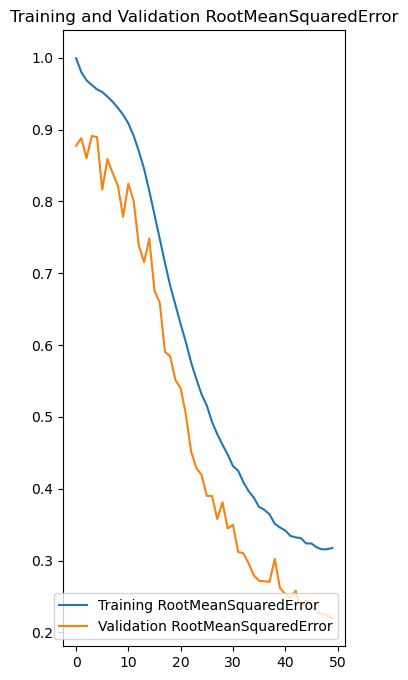

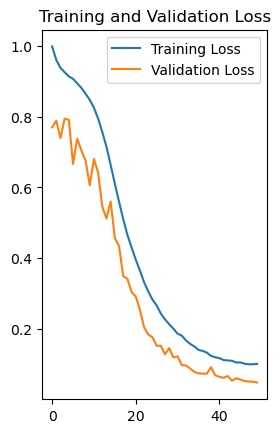

In [87]:
pltGraph(Model6)

13/13 [==============================] - 1s 11ms/step


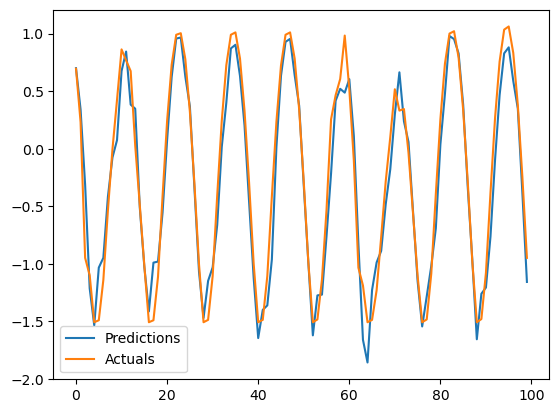

MAPE: 89.91451098010405
MSE for Predictions: 0.06850776199738372
MAE:  0.20108627


In [88]:
plot_predictions2(model6, X3_test, y3_test)

In [37]:
from tensorflow.keras.losses import Huber

model = Sequential()

model.add(Conv1D(filters=128,  kernel_size= 1, activation='tanh',padding='same',input_shape=(10,13)))
# model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(units=256, return_sequences=True,activation='tanh'))

model.add(Dropout(0.5))

model.add(Conv1D(filters=64,  kernel_size= 1, activation='tanh',padding='same',input_shape=(10,13)))
# model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(units=128, return_sequences=True,activation='tanh'))

model.add(Dropout(0.4))

model.add(Conv1D(filters=32,  kernel_size= 1, activation='tanh',padding='same',input_shape=(10,13)))
# model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(units=64, return_sequences=False,activation='tanh'))


model.add(Dense(1))

model.summary()

2024-03-30 00:40:39.831710: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-30 00:40:39.831772: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-30 00:40:39.831786: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-30 00:40:39.832073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-30 00:40:39.832481: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 128)           1792      
                                                                 
 lstm (LSTM)                 (None, 10, 256)           394240    
                                                                 
 dropout (Dropout)           (None, 10, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            16448     
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 10, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 32)            4

In [38]:
from graphviz import Digraph
dot = Digraph()

for layer in model.layers:
    dot.node(str(layer.name), label=layer.name)

# Add edges between layers
for i in range(len(model.layers) - 1):
    dot.edge(str(model.layers[i].name), str(model.layers[i + 1].name))

# Save the graph to a file
dot.render('model_graph', format='png', cleanup=True)

'model_graph.png'

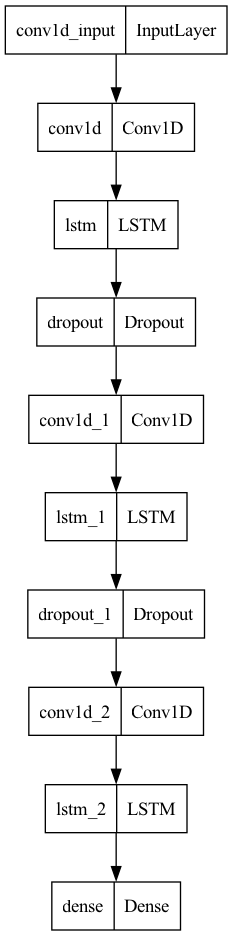

In [39]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [47]:
cp17 = ModelCheckpoint('models/model17_10win_all/', save_best_only=True)
model.compile(loss=Huber(), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(),'mse', 'mae'])

In [48]:
Model = model.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp17])

Epoch 1/50


2024-03-30 00:31:20.714891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.4668 - root_mean_squared_error: 1.0030 - mse: 1.0059 - mae: 0.8760INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 13s 81ms/step - loss: 0.4668 - root_mean_squared_error: 1.0030 - mse: 1.0059 - mae: 0.8760 - val_loss: 0.3935 - val_root_mean_squared_error: 0.9226 - val_mse: 0.8512 - val_mae: 0.7629
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 0.4591 - root_mean_squared_error: 0.9942 - mse: 0.9884 - mae: 0.8662INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 69ms/step - loss: 0.4591 - root_mean_squared_error: 0.9942 - mse: 0.9884 - mae: 0.8662 - val_loss: 0.3669 - val_root_mean_squared_error: 0.8848 - val_mse: 0.7829 - val_mae: 0.7332
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 0.4307 - root_mean_squared_error: 0.9668 - mse: 0.9347 - mae: 0.8291INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 73ms/step - loss: 0.4307 - root_mean_squared_error: 0.9668 - mse: 0.9347 - mae: 0.8291 - val_loss: 0.3241 - val_root_mean_squared_error: 0.8230 - val_mse: 0.6773 - val_mae: 0.7041
Epoch 4/50
125/125 [==============================] - 4s 33ms/step - loss: 0.3910 - root_mean_squared_error: 0.9229 - mse: 0.8518 - mae: 0.7740 - val_loss: 0.4671 - val_root_mean_squared_error: 1.0262 - val_mse: 1.0531 - val_mae: 0.8627
Epoch 5/50
124/125 [============================>.] - ETA: 0s - loss: 0.3629 - root_mean_squared_error: 0.8909 - mse: 0.7936 - mae: 0.7362INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 71ms/step - loss: 0.3631 - root_mean_squared_error: 0.8911 - mse: 0.7940 - mae: 0.7364 - val_loss: 0.3004 - val_root_mean_squared_error: 0.7978 - val_mse: 0.6366 - val_mae: 0.6688
Epoch 6/50
125/125 [==============================] - 4s 33ms/step - loss: 0.3195 - root_mean_squared_error: 0.8337 - mse: 0.6950 - mae: 0.6788 - val_loss: 0.4486 - val_root_mean_squared_error: 1.0069 - val_mse: 1.0139 - val_mae: 0.8508
Epoch 7/50
125/125 [==============================] - 4s 33ms/step - loss: 0.2913 - root_mean_squared_error: 0.7944 - mse: 0.6311 - mae: 0.6420 - val_loss: 0.3487 - val_root_mean_squared_error: 0.8708 - val_mse: 0.7582 - val_mae: 0.7294
Epoch 8/50
125/125 [==============================] - 5s 37ms/step - loss: 0.2556 - root_mean_squared_error: 0.7396 - mse: 0.5470 - mae: 0.5952 - val_loss: 0.4179 - val_root_mean_squared_error: 0.9643 - val_mse: 0.9298 - val_mae: 0.8142
Epoch 9/50
125/125 [==============================] - ETA: 0s -

INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 69ms/step - loss: 0.2343 - root_mean_squared_error: 0.7054 - mse: 0.4975 - mae: 0.5634 - val_loss: 0.2108 - val_root_mean_squared_error: 0.6587 - val_mse: 0.4338 - val_mae: 0.5430
Epoch 10/50
125/125 [==============================] - 4s 33ms/step - loss: 0.2122 - root_mean_squared_error: 0.6693 - mse: 0.4480 - mae: 0.5332 - val_loss: 0.3189 - val_root_mean_squared_error: 0.8255 - val_mse: 0.6815 - val_mae: 0.6957
Epoch 11/50
125/125 [==============================] - 4s 33ms/step - loss: 0.1972 - root_mean_squared_error: 0.6430 - mse: 0.4134 - mae: 0.5124 - val_loss: 0.2590 - val_root_mean_squared_error: 0.7357 - val_mse: 0.5412 - val_mae: 0.6161
Epoch 12/50
125/125 [==============================] - ETA: 0s - loss: 0.1854 - root_mean_squared_error: 0.6234 - mse: 0.3886 - mae: 0.4954INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 70ms/step - loss: 0.1854 - root_mean_squared_error: 0.6234 - mse: 0.3886 - mae: 0.4954 - val_loss: 0.2068 - val_root_mean_squared_error: 0.6542 - val_mse: 0.4280 - val_mae: 0.5408
Epoch 13/50
125/125 [==============================] - 5s 37ms/step - loss: 0.1761 - root_mean_squared_error: 0.6058 - mse: 0.3670 - mae: 0.4809 - val_loss: 0.2409 - val_root_mean_squared_error: 0.7073 - val_mse: 0.5002 - val_mae: 0.5997
Epoch 14/50
125/125 [==============================] - ETA: 0s - loss: 0.1648 - root_mean_squared_error: 0.5860 - mse: 0.3434 - mae: 0.4653INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 8s 67ms/step - loss: 0.1648 - root_mean_squared_error: 0.5860 - mse: 0.3434 - mae: 0.4653 - val_loss: 0.2037 - val_root_mean_squared_error: 0.6481 - val_mse: 0.4201 - val_mae: 0.5419
Epoch 15/50
125/125 [==============================] - 5s 36ms/step - loss: 0.1581 - root_mean_squared_error: 0.5733 - mse: 0.3287 - mae: 0.4529 - val_loss: 0.2509 - val_root_mean_squared_error: 0.7234 - val_mse: 0.5233 - val_mae: 0.6105
Epoch 16/50
125/125 [==============================] - ETA: 0s - loss: 0.1458 - root_mean_squared_error: 0.5500 - mse: 0.3025 - mae: 0.4333INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 72ms/step - loss: 0.1458 - root_mean_squared_error: 0.5500 - mse: 0.3025 - mae: 0.4333 - val_loss: 0.1845 - val_root_mean_squared_error: 0.6163 - val_mse: 0.3799 - val_mae: 0.5069
Epoch 17/50
125/125 [==============================] - ETA: 0s - loss: 0.1404 - root_mean_squared_error: 0.5399 - mse: 0.2915 - mae: 0.4228INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 71ms/step - loss: 0.1404 - root_mean_squared_error: 0.5399 - mse: 0.2915 - mae: 0.4228 - val_loss: 0.1188 - val_root_mean_squared_error: 0.4909 - val_mse: 0.2410 - val_mae: 0.3936
Epoch 18/50
125/125 [==============================] - 4s 35ms/step - loss: 0.1362 - root_mean_squared_error: 0.5317 - mse: 0.2827 - mae: 0.4130 - val_loss: 0.1895 - val_root_mean_squared_error: 0.6219 - val_mse: 0.3868 - val_mae: 0.5316
Epoch 19/50
125/125 [==============================] - 4s 34ms/step - loss: 0.1255 - root_mean_squared_error: 0.5105 - mse: 0.2606 - mae: 0.3970 - val_loss: 0.1539 - val_root_mean_squared_error: 0.5609 - val_mse: 0.3146 - val_mae: 0.4483
Epoch 20/50
125/125 [==============================] - 5s 38ms/step - loss: 0.1225 - root_mean_squared_error: 0.5039 - mse: 0.2539 - mae: 0.3896 - val_loss: 0.1455 - val_root_mean_squared_error: 0.5454 - val_mse: 0.2975 - val_mae: 0.4339
Epoch 21/50
125/125 [==============================] - 4s 34

INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 71ms/step - loss: 0.1092 - root_mean_squared_error: 0.4762 - mse: 0.2268 - mae: 0.3608 - val_loss: 0.1164 - val_root_mean_squared_error: 0.4860 - val_mse: 0.2362 - val_mae: 0.3803
Epoch 24/50
125/125 [==============================] - ETA: 0s - loss: 0.1048 - root_mean_squared_error: 0.4662 - mse: 0.2173 - mae: 0.3520INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 69ms/step - loss: 0.1048 - root_mean_squared_error: 0.4662 - mse: 0.2173 - mae: 0.3520 - val_loss: 0.1080 - val_root_mean_squared_error: 0.4683 - val_mse: 0.2193 - val_mae: 0.3635
Epoch 25/50
125/125 [==============================] - ETA: 0s - loss: 0.1009 - root_mean_squared_error: 0.4575 - mse: 0.2093 - mae: 0.3431INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 69ms/step - loss: 0.1009 - root_mean_squared_error: 0.4575 - mse: 0.2093 - mae: 0.3431 - val_loss: 0.0980 - val_root_mean_squared_error: 0.4460 - val_mse: 0.1989 - val_mae: 0.3399
Epoch 26/50
125/125 [==============================] - ETA: 0s - loss: 0.1009 - root_mean_squared_error: 0.4576 - mse: 0.2094 - mae: 0.3425INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 69ms/step - loss: 0.1009 - root_mean_squared_error: 0.4576 - mse: 0.2094 - mae: 0.3425 - val_loss: 0.0894 - val_root_mean_squared_error: 0.4266 - val_mse: 0.1820 - val_mae: 0.3280
Epoch 27/50
125/125 [==============================] - ETA: 0s - loss: 0.0927 - root_mean_squared_error: 0.4396 - mse: 0.1933 - mae: 0.3229INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 70ms/step - loss: 0.0927 - root_mean_squared_error: 0.4396 - mse: 0.1933 - mae: 0.3229 - val_loss: 0.0828 - val_root_mean_squared_error: 0.4094 - val_mse: 0.1676 - val_mae: 0.3065
Epoch 28/50
125/125 [==============================] - ETA: 0s - loss: 0.0899 - root_mean_squared_error: 0.4322 - mse: 0.1868 - mae: 0.3200INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 69ms/step - loss: 0.0899 - root_mean_squared_error: 0.4322 - mse: 0.1868 - mae: 0.3200 - val_loss: 0.0601 - val_root_mean_squared_error: 0.3480 - val_mse: 0.1211 - val_mae: 0.2539
Epoch 29/50
125/125 [==============================] - ETA: 0s - loss: 0.0895 - root_mean_squared_error: 0.4316 - mse: 0.1863 - mae: 0.3181INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 70ms/step - loss: 0.0895 - root_mean_squared_error: 0.4316 - mse: 0.1863 - mae: 0.3181 - val_loss: 0.0583 - val_root_mean_squared_error: 0.3426 - val_mse: 0.1174 - val_mae: 0.2529
Epoch 30/50
125/125 [==============================] - ETA: 0s - loss: 0.0884 - root_mean_squared_error: 0.4277 - mse: 0.1829 - mae: 0.3157INFO:tensorflow:Assets written to: models/model17_10win_all/assets


INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 8s 68ms/step - loss: 0.0884 - root_mean_squared_error: 0.4277 - mse: 0.1829 - mae: 0.3157 - val_loss: 0.0468 - val_root_mean_squared_error: 0.3066 - val_mse: 0.0940 - val_mae: 0.2268
Epoch 31/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0824 - root_mean_squared_error: 0.4134 - mse: 0.1709 - mae: 0.3033 - val_loss: 0.0771 - val_root_mean_squared_error: 0.3944 - val_mse: 0.1556 - val_mae: 0.2919
Epoch 32/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0832 - root_mean_squared_error: 0.4154 - mse: 0.1726 - mae: 0.3032 - val_loss: 0.0480 - val_root_mean_squared_error: 0.3110 - val_mse: 0.0967 - val_mae: 0.2238
Epoch 33/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0798 - root_mean_squared_error: 0.4068 - mse: 0.1655 - mae: 0.2962 - val_loss: 0.0564 - val_root_mean_squared_error: 0.3375 - val_mse: 0.1139 - val_mae: 0.2468
Epoch 34/50
125/125 [==============================] - 4s 33

INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 70ms/step - loss: 0.0720 - root_mean_squared_error: 0.3868 - mse: 0.1496 - mae: 0.2754 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2850 - val_mse: 0.0812 - val_mae: 0.2048
Epoch 38/50
125/125 [==============================] - 4s 34ms/step - loss: 0.0697 - root_mean_squared_error: 0.3812 - mse: 0.1453 - mae: 0.2688 - val_loss: 0.0453 - val_root_mean_squared_error: 0.3024 - val_mse: 0.0914 - val_mae: 0.2180
Epoch 39/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0717 - root_mean_squared_error: 0.3861 - mse: 0.1490 - mae: 0.2750 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2868 - val_mse: 0.0822 - val_mae: 0.2086
Epoch 40/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0691 - root_mean_squared_error: 0.3791 - mse: 0.1437 - mae: 0.2692 - val_loss: 0.0450 - val_root_mean_squared_error: 0.3014 - val_mse: 0.0908 - val_mae: 0.2160
Epoch 41/50
125/125 [==============================] - 4s 33

INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 69ms/step - loss: 0.0643 - root_mean_squared_error: 0.3660 - mse: 0.1340 - mae: 0.2563 - val_loss: 0.0319 - val_root_mean_squared_error: 0.2534 - val_mse: 0.0642 - val_mae: 0.1790
Epoch 44/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0629 - root_mean_squared_error: 0.3615 - mse: 0.1307 - mae: 0.2517 - val_loss: 0.0372 - val_root_mean_squared_error: 0.2740 - val_mse: 0.0751 - val_mae: 0.1966
Epoch 45/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0619 - root_mean_squared_error: 0.3591 - mse: 0.1289 - mae: 0.2507 - val_loss: 0.0490 - val_root_mean_squared_error: 0.3150 - val_mse: 0.0992 - val_mae: 0.2376
Epoch 46/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0604 - root_mean_squared_error: 0.3548 - mse: 0.1259 - mae: 0.2455 - val_loss: 0.0399 - val_root_mean_squared_error: 0.2833 - val_mse: 0.0803 - val_mae: 0.2044
Epoch 47/50
125/125 [==============================] - 4s 33

INFO:tensorflow:Assets written to: models/model17_10win_all/assets


125/125 [==============================] - 9s 70ms/step - loss: 0.0577 - root_mean_squared_error: 0.3461 - mse: 0.1198 - mae: 0.2397 - val_loss: 0.0317 - val_root_mean_squared_error: 0.2531 - val_mse: 0.0641 - val_mae: 0.1802
Epoch 50/50
125/125 [==============================] - 4s 33ms/step - loss: 0.0562 - root_mean_squared_error: 0.3421 - mse: 0.1171 - mae: 0.2337 - val_loss: 0.0328 - val_root_mean_squared_error: 0.2577 - val_mse: 0.0664 - val_mae: 0.1844


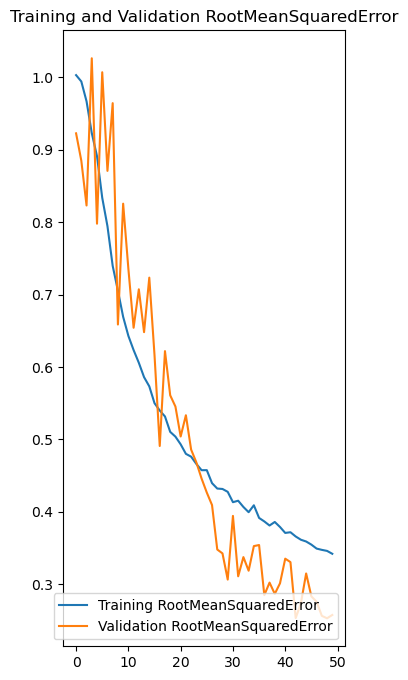

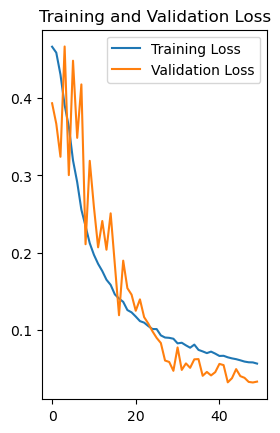

In [49]:
pltGraph(Model)

13/13 [==============================] - 1s 16ms/step


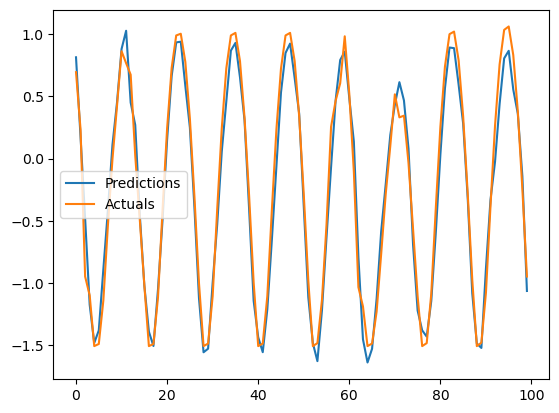

MAPE: 98.83904842564719
MSE for Predictions: 0.06400987371018398
MAE:  0.17544387


In [50]:
plot_predictions2(model, X3_test, y3_test)

# Above model is good  model17

In [101]:

# Define input shape
input_shape = (10,13)  # Replace input_dim with your input sequence length

# Create the Sequential model
model7 = Sequential()
model7.add(InputLayer((10, 13)))
# Add the convolutional layers
model7.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
model7.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))

# Add the max pooling layer
model7.add(MaxPooling1D(pool_size=2))

# Add the LSTM layer
model7.add(LSTM(units=64, return_sequences=False))

model7.add(Dense(units=16, activation='relu'))

# Add the output dense layer
model7.add(Dense(units=1, activation='linear'))  # Replace output_dim with your desired output dimensionality

model7.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 10, 32)            1280      
                                                                 
 conv1d_25 (Conv1D)          (None, 10, 64)            6208      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 lstm_24 (LSTM)              (None, 64)                33024     
                                                                 
 dense_30 (Dense)            (None, 16)                1040      
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                     

In [102]:
cp7 = ModelCheckpoint('models/model7_winsize10/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [103]:
# Train the model
Model7 = model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp7])

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 0.9936 - root_mean_squared_error: 0.9968INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 9s 59ms/step - loss: 0.9936 - root_mean_squared_error: 0.9968 - val_loss: 0.8233 - val_root_mean_squared_error: 0.9074
Epoch 2/50
125/125 [==============================] - 2s 18ms/step - loss: 0.9488 - root_mean_squared_error: 0.9740 - val_loss: 0.8534 - val_root_mean_squared_error: 0.9238
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 0.9527 - root_mean_squared_error: 0.9760INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 33ms/step - loss: 0.9527 - root_mean_squared_error: 0.9760 - val_loss: 0.8047 - val_root_mean_squared_error: 0.8970
Epoch 4/50
125/125 [==============================] - 2s 16ms/step - loss: 0.9596 - root_mean_squared_error: 0.9796 - val_loss: 0.8617 - val_root_mean_squared_error: 0.9283
Epoch 5/50
124/125 [============================>.] - ETA: 0s - loss: 0.9462 - root_mean_squared_error: 0.9727INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 30ms/step - loss: 0.9460 - root_mean_squared_error: 0.9726 - val_loss: 0.7931 - val_root_mean_squared_error: 0.8906
Epoch 6/50
125/125 [==============================] - ETA: 0s - loss: 0.9378 - root_mean_squared_error: 0.9684INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 31ms/step - loss: 0.9378 - root_mean_squared_error: 0.9684 - val_loss: 0.7304 - val_root_mean_squared_error: 0.8546
Epoch 7/50
125/125 [==============================] - ETA: 0s - loss: 0.9346 - root_mean_squared_error: 0.9667INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 31ms/step - loss: 0.9346 - root_mean_squared_error: 0.9667 - val_loss: 0.6568 - val_root_mean_squared_error: 0.8104
Epoch 8/50
125/125 [==============================] - 2s 20ms/step - loss: 0.9046 - root_mean_squared_error: 0.9511 - val_loss: 0.6846 - val_root_mean_squared_error: 0.8274
Epoch 9/50
125/125 [==============================] - 2s 16ms/step - loss: 0.8932 - root_mean_squared_error: 0.9451 - val_loss: 0.7163 - val_root_mean_squared_error: 0.8463
Epoch 10/50
125/125 [==============================] - 2s 16ms/step - loss: 0.8958 - root_mean_squared_error: 0.9465 - val_loss: 0.7121 - val_root_mean_squared_error: 0.8438
Epoch 11/50
125/125 [==============================] - 2s 16ms/step - loss: 0.8849 - root_mean_squared_error: 0.9407 - val_loss: 0.8134 - val_root_mean_squared_error: 0.9019
Epoch 12/50
125/125 [==============================] - ETA: 0s - loss: 0.8737 - root_mean_squared_error: 0.9347INFO:tensorflow:Assets written to

INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 6s 49ms/step - loss: 0.8737 - root_mean_squared_error: 0.9347 - val_loss: 0.6372 - val_root_mean_squared_error: 0.7983
Epoch 13/50
125/125 [==============================] - ETA: 0s - loss: 0.8314 - root_mean_squared_error: 0.9118INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 31ms/step - loss: 0.8314 - root_mean_squared_error: 0.9118 - val_loss: 0.6069 - val_root_mean_squared_error: 0.7790
Epoch 14/50
125/125 [==============================] - ETA: 0s - loss: 0.8038 - root_mean_squared_error: 0.8966INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 30ms/step - loss: 0.8038 - root_mean_squared_error: 0.8966 - val_loss: 0.5871 - val_root_mean_squared_error: 0.7662
Epoch 15/50
125/125 [==============================] - 2s 16ms/step - loss: 0.7490 - root_mean_squared_error: 0.8654 - val_loss: 0.6180 - val_root_mean_squared_error: 0.7861
Epoch 16/50
124/125 [============================>.] - ETA: 0s - loss: 0.6953 - root_mean_squared_error: 0.8339INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 30ms/step - loss: 0.6955 - root_mean_squared_error: 0.8340 - val_loss: 0.5847 - val_root_mean_squared_error: 0.7647
Epoch 17/50
125/125 [==============================] - 2s 16ms/step - loss: 0.6283 - root_mean_squared_error: 0.7927 - val_loss: 0.6574 - val_root_mean_squared_error: 0.8108
Epoch 18/50
125/125 [==============================] - ETA: 0s - loss: 0.5547 - root_mean_squared_error: 0.7448INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 30ms/step - loss: 0.5547 - root_mean_squared_error: 0.7448 - val_loss: 0.4038 - val_root_mean_squared_error: 0.6355
Epoch 19/50
125/125 [==============================] - 2s 16ms/step - loss: 0.5200 - root_mean_squared_error: 0.7211 - val_loss: 0.5809 - val_root_mean_squared_error: 0.7622
Epoch 20/50
125/125 [==============================] - ETA: 0s - loss: 0.4736 - root_mean_squared_error: 0.6882INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 29ms/step - loss: 0.4736 - root_mean_squared_error: 0.6882 - val_loss: 0.3050 - val_root_mean_squared_error: 0.5523
Epoch 21/50
125/125 [==============================] - ETA: 0s - loss: 0.4252 - root_mean_squared_error: 0.6520INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 29ms/step - loss: 0.4252 - root_mean_squared_error: 0.6520 - val_loss: 0.2999 - val_root_mean_squared_error: 0.5477
Epoch 22/50
125/125 [==============================] - 2s 16ms/step - loss: 0.4176 - root_mean_squared_error: 0.6462 - val_loss: 0.3963 - val_root_mean_squared_error: 0.6295
Epoch 23/50
125/125 [==============================] - 2s 16ms/step - loss: 0.3651 - root_mean_squared_error: 0.6043 - val_loss: 0.3028 - val_root_mean_squared_error: 0.5502
Epoch 24/50
125/125 [==============================] - ETA: 0s - loss: 0.3314 - root_mean_squared_error: 0.5757INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 29ms/step - loss: 0.3314 - root_mean_squared_error: 0.5757 - val_loss: 0.2288 - val_root_mean_squared_error: 0.4783
Epoch 25/50
125/125 [==============================] - 2s 17ms/step - loss: 0.3139 - root_mean_squared_error: 0.5603 - val_loss: 0.2372 - val_root_mean_squared_error: 0.4870
Epoch 26/50
125/125 [==============================] - 2s 16ms/step - loss: 0.2722 - root_mean_squared_error: 0.5217 - val_loss: 0.3927 - val_root_mean_squared_error: 0.6267
Epoch 27/50
125/125 [==============================] - 2s 19ms/step - loss: 0.2597 - root_mean_squared_error: 0.5096 - val_loss: 0.2424 - val_root_mean_squared_error: 0.4924
Epoch 28/50
125/125 [==============================] - ETA: 0s - loss: 0.2405 - root_mean_squared_error: 0.4904INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 30ms/step - loss: 0.2405 - root_mean_squared_error: 0.4904 - val_loss: 0.1535 - val_root_mean_squared_error: 0.3919
Epoch 29/50
125/125 [==============================] - ETA: 0s - loss: 0.2354 - root_mean_squared_error: 0.4852INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 32ms/step - loss: 0.2354 - root_mean_squared_error: 0.4852 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3542
Epoch 30/50
125/125 [==============================] - 2s 16ms/step - loss: 0.2106 - root_mean_squared_error: 0.4590 - val_loss: 0.1808 - val_root_mean_squared_error: 0.4252
Epoch 31/50
125/125 [==============================] - 2s 18ms/step - loss: 0.2253 - root_mean_squared_error: 0.4746 - val_loss: 0.2603 - val_root_mean_squared_error: 0.5102
Epoch 32/50
125/125 [==============================] - 2s 16ms/step - loss: 0.2023 - root_mean_squared_error: 0.4497 - val_loss: 0.1462 - val_root_mean_squared_error: 0.3824
Epoch 33/50
125/125 [==============================] - 2s 16ms/step - loss: 0.2109 - root_mean_squared_error: 0.4592 - val_loss: 0.1915 - val_root_mean_squared_error: 0.4376
Epoch 34/50
123/125 [============================>.] - ETA: 0s - loss: 0.1905 - root_mean_squared_error: 0.4365INFO:tensorflow:Assets written 

INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 30ms/step - loss: 0.1904 - root_mean_squared_error: 0.4363 - val_loss: 0.1074 - val_root_mean_squared_error: 0.3277
Epoch 35/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1716 - root_mean_squared_error: 0.4142 - val_loss: 0.2412 - val_root_mean_squared_error: 0.4911
Epoch 36/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1683 - root_mean_squared_error: 0.4102 - val_loss: 0.1241 - val_root_mean_squared_error: 0.3523
Epoch 37/50
124/125 [============================>.] - ETA: 0s - loss: 0.1608 - root_mean_squared_error: 0.4010INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 29ms/step - loss: 0.1607 - root_mean_squared_error: 0.4009 - val_loss: 0.0899 - val_root_mean_squared_error: 0.2998
Epoch 38/50
123/125 [============================>.] - ETA: 0s - loss: 0.1462 - root_mean_squared_error: 0.3824INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 30ms/step - loss: 0.1459 - root_mean_squared_error: 0.3820 - val_loss: 0.0730 - val_root_mean_squared_error: 0.2701
Epoch 39/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1536 - root_mean_squared_error: 0.3919 - val_loss: 0.1869 - val_root_mean_squared_error: 0.4323
Epoch 40/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1438 - root_mean_squared_error: 0.3792 - val_loss: 0.1836 - val_root_mean_squared_error: 0.4285
Epoch 41/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1392 - root_mean_squared_error: 0.3731 - val_loss: 0.0953 - val_root_mean_squared_error: 0.3086
Epoch 42/50
125/125 [==============================] - ETA: 0s - loss: 0.1506 - root_mean_squared_error: 0.3880INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 29ms/step - loss: 0.1506 - root_mean_squared_error: 0.3880 - val_loss: 0.0629 - val_root_mean_squared_error: 0.2509
Epoch 43/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1468 - root_mean_squared_error: 0.3832 - val_loss: 0.1217 - val_root_mean_squared_error: 0.3488
Epoch 44/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1361 - root_mean_squared_error: 0.3690 - val_loss: 0.1429 - val_root_mean_squared_error: 0.3780
Epoch 45/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1464 - root_mean_squared_error: 0.3826 - val_loss: 0.0978 - val_root_mean_squared_error: 0.3127
Epoch 46/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1343 - root_mean_squared_error: 0.3665 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2701
Epoch 47/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1265 - root_mean_squared_error: 0.3557 - val_loss: 0.0968 - val_

INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 29ms/step - loss: 0.1208 - root_mean_squared_error: 0.3475 - val_loss: 0.0592 - val_root_mean_squared_error: 0.2432
Epoch 49/50
125/125 [==============================] - ETA: 0s - loss: 0.1273 - root_mean_squared_error: 0.3567INFO:tensorflow:Assets written to: models/model7_winsize10/assets


INFO:tensorflow:Assets written to: models/model7_winsize10/assets


125/125 [==============================] - 4s 29ms/step - loss: 0.1273 - root_mean_squared_error: 0.3567 - val_loss: 0.0489 - val_root_mean_squared_error: 0.2212
Epoch 50/50
125/125 [==============================] - 2s 16ms/step - loss: 0.1252 - root_mean_squared_error: 0.3538 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2245


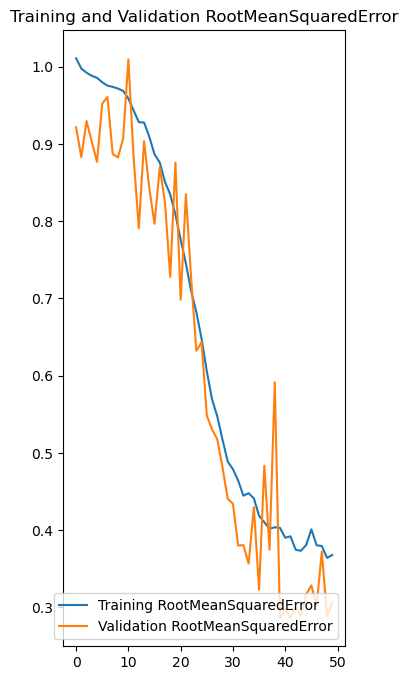

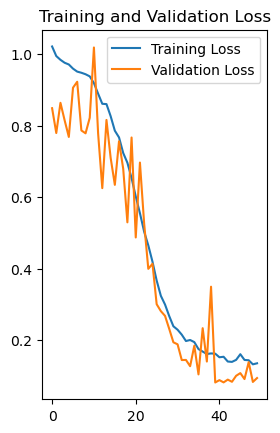

In [93]:
pltGraph(Model7)

13/13 [==============================] - 1s 14ms/step


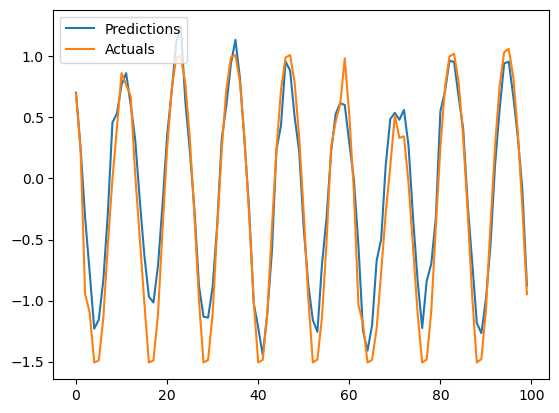

MAPE: 135.88878890846036
MSE for Predictions: 0.09372602693424811
MAE:  0.22238433


In [94]:
plot_predictions2(model7, X3_test, y3_test)

In [96]:
model3 = Sequential()
model3.add(InputLayer((7, 13)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                15168     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 15697 (61.32 KB)
Trainable params: 15697 (61.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp3])

Epoch 1/50


2024-03-24 01:14:35.754167: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


125/125 [==============================] - ETA: 0s - loss: 1.1176 - root_mean_squared_error: 1.0572INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 4s 21ms/step - loss: 1.1176 - root_mean_squared_error: 1.0572 - val_loss: 0.9031 - val_root_mean_squared_error: 0.9503
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 1.0883 - root_mean_squared_error: 1.0432INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 16ms/step - loss: 1.0883 - root_mean_squared_error: 1.0432 - val_loss: 0.8566 - val_root_mean_squared_error: 0.9255
Epoch 3/50
125/125 [==============================] - 1s 9ms/step - loss: 1.0803 - root_mean_squared_error: 1.0394 - val_loss: 0.8587 - val_root_mean_squared_error: 0.9267
Epoch 4/50
125/125 [==============================] - 1s 9ms/step - loss: 1.0768 - root_mean_squared_error: 1.0377 - val_loss: 0.8638 - val_root_mean_squared_error: 0.9294
Epoch 5/50
125/125 [==============================] - 1s 10ms/step - loss: 1.0739 - root_mean_squared_error: 1.0363 - val_loss: 0.8610 - val_root_mean_squared_error: 0.9279
Epoch 6/50
125/125 [==============================] - 1s 9ms/step - loss: 1.0723 - root_mean_squared_error: 1.0355 - val_loss: 0.8582 - val_root_mean_squared_error: 0.9264
Epoch 7/50
125/125 [==============================] - 1s 10ms/step - loss: 1.0718 - root_mean_squared_error: 1.0353 - val_loss: 0.8668 - val_root_mea

INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 19ms/step - loss: 1.0650 - root_mean_squared_error: 1.0320 - val_loss: 0.8560 - val_root_mean_squared_error: 0.9252
Epoch 14/50
125/125 [==============================] - 1s 10ms/step - loss: 1.0651 - root_mean_squared_error: 1.0320 - val_loss: 0.8669 - val_root_mean_squared_error: 0.9311
Epoch 15/50
125/125 [==============================] - 1s 10ms/step - loss: 1.0717 - root_mean_squared_error: 1.0352 - val_loss: 0.8852 - val_root_mean_squared_error: 0.9409
Epoch 16/50
125/125 [==============================] - 1s 9ms/step - loss: 1.0936 - root_mean_squared_error: 1.0458 - val_loss: 0.9036 - val_root_mean_squared_error: 0.9506
Epoch 17/50
125/125 [==============================] - ETA: 0s - loss: 1.1514 - root_mean_squared_error: 1.0730INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 16ms/step - loss: 1.1514 - root_mean_squared_error: 1.0730 - val_loss: 0.7690 - val_root_mean_squared_error: 0.8769
Epoch 18/50
125/125 [==============================] - 1s 10ms/step - loss: 1.2640 - root_mean_squared_error: 1.1243 - val_loss: 0.9243 - val_root_mean_squared_error: 0.9614
Epoch 19/50
125/125 [==============================] - 1s 10ms/step - loss: 1.2110 - root_mean_squared_error: 1.1005 - val_loss: 0.9055 - val_root_mean_squared_error: 0.9516
Epoch 20/50
125/125 [==============================] - 1s 9ms/step - loss: 1.1811 - root_mean_squared_error: 1.0868 - val_loss: 0.9213 - val_root_mean_squared_error: 0.9598
Epoch 21/50
125/125 [==============================] - 1s 10ms/step - loss: 1.1555 - root_mean_squared_error: 1.0749 - val_loss: 0.9285 - val_root_mean_squared_error: 0.9636
Epoch 22/50
125/125 [==============================] - 1s 9ms/step - loss: 1.1318 - root_mean_squared_error: 1.0639 - val_loss: 0.9324 - val_ro

INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 16ms/step - loss: 0.9231 - root_mean_squared_error: 0.9608 - val_loss: 0.7648 - val_root_mean_squared_error: 0.8745
Epoch 37/50
125/125 [==============================] - 1s 10ms/step - loss: 0.9067 - root_mean_squared_error: 0.9522 - val_loss: 0.7940 - val_root_mean_squared_error: 0.8910
Epoch 38/50
121/125 [============================>.] - ETA: 0s - loss: 0.8863 - root_mean_squared_error: 0.9414INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 16ms/step - loss: 0.8883 - root_mean_squared_error: 0.9425 - val_loss: 0.7403 - val_root_mean_squared_error: 0.8604
Epoch 39/50
125/125 [==============================] - 1s 10ms/step - loss: 0.8708 - root_mean_squared_error: 0.9332 - val_loss: 0.7538 - val_root_mean_squared_error: 0.8682
Epoch 40/50
124/125 [============================>.] - ETA: 0s - loss: 0.8479 - root_mean_squared_error: 0.9208INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 18ms/step - loss: 0.8481 - root_mean_squared_error: 0.9210 - val_loss: 0.7043 - val_root_mean_squared_error: 0.8392
Epoch 41/50
125/125 [==============================] - ETA: 0s - loss: 0.8097 - root_mean_squared_error: 0.8999INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 20ms/step - loss: 0.8097 - root_mean_squared_error: 0.8999 - val_loss: 0.6836 - val_root_mean_squared_error: 0.8268
Epoch 42/50
123/125 [============================>.] - ETA: 0s - loss: 0.7305 - root_mean_squared_error: 0.8547INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 16ms/step - loss: 0.7287 - root_mean_squared_error: 0.8536 - val_loss: 0.5774 - val_root_mean_squared_error: 0.7599
Epoch 43/50
122/125 [============================>.] - ETA: 0s - loss: 0.6670 - root_mean_squared_error: 0.8167INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 19ms/step - loss: 0.6660 - root_mean_squared_error: 0.8161 - val_loss: 0.5436 - val_root_mean_squared_error: 0.7373
Epoch 44/50
123/125 [============================>.] - ETA: 0s - loss: 0.6204 - root_mean_squared_error: 0.7877INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 17ms/step - loss: 0.6203 - root_mean_squared_error: 0.7876 - val_loss: 0.5104 - val_root_mean_squared_error: 0.7145
Epoch 45/50
123/125 [============================>.] - ETA: 0s - loss: 0.5826 - root_mean_squared_error: 0.7633INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 16ms/step - loss: 0.5831 - root_mean_squared_error: 0.7636 - val_loss: 0.4861 - val_root_mean_squared_error: 0.6972
Epoch 46/50
120/125 [===========================>..] - ETA: 0s - loss: 0.5441 - root_mean_squared_error: 0.7376INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 19ms/step - loss: 0.5469 - root_mean_squared_error: 0.7395 - val_loss: 0.4606 - val_root_mean_squared_error: 0.6786
Epoch 47/50
122/125 [============================>.] - ETA: 0s - loss: 0.5143 - root_mean_squared_error: 0.7171INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 16ms/step - loss: 0.5146 - root_mean_squared_error: 0.7174 - val_loss: 0.4405 - val_root_mean_squared_error: 0.6637
Epoch 48/50
124/125 [============================>.] - ETA: 0s - loss: 0.4842 - root_mean_squared_error: 0.6958INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 17ms/step - loss: 0.4841 - root_mean_squared_error: 0.6958 - val_loss: 0.3937 - val_root_mean_squared_error: 0.6275
Epoch 49/50
125/125 [==============================] - ETA: 0s - loss: 0.4524 - root_mean_squared_error: 0.6726INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 17ms/step - loss: 0.4524 - root_mean_squared_error: 0.6726 - val_loss: 0.3764 - val_root_mean_squared_error: 0.6135
Epoch 50/50
121/125 [============================>.] - ETA: 0s - loss: 0.4251 - root_mean_squared_error: 0.6520INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


125/125 [==============================] - 2s 19ms/step - loss: 0.4256 - root_mean_squared_error: 0.6524 - val_loss: 0.3422 - val_root_mean_squared_error: 0.5850


In [98]:
pltGraph(model3)

TypeError: 'History' object is not subscriptable

13/13 [==============================] - 0s 4ms/step


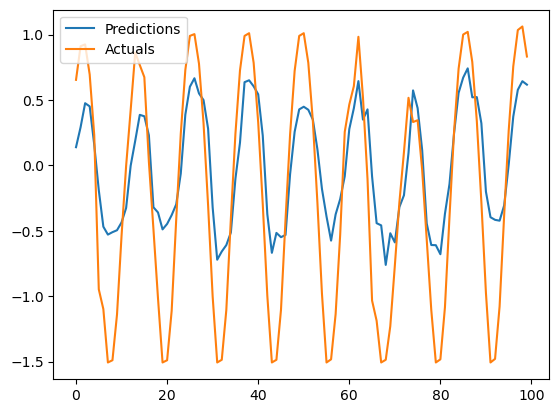

MSE for Predictions: 0.3467514614064901


In [99]:
plot_predictions2(model3, X3_test, y3_test)

In [ ]:
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.WQ = self.add_weight(name="WQ", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        self.WK = self.add_weight(name="WK", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        self.WV = self.add_weight(name="WV", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, **kwargs):
        Q = tf.matmul(inputs, self.WQ)
        K = tf.matmul(inputs, self.WK)
        V = tf.matmul(inputs, self.WV)
        attention_weights = tf.nn.softmax(tf.matmul(Q, K, transpose_b=True) / tf.math.sqrt(tf.cast(tf.shape(K)[-1], tf.float32)), axis=-1)
        output = tf.matmul(attention_weights, V)
        return output

In [ ]:
input_shape = (7,17)  # Replace input_dim with your input sequence length

# Create the Sequential model
model8 = Sequential()
model8.add(InputLayer((7, 17)))
# Add the convolutional layers
model8.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
model8.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))

# Add the max pooling layer
model8.add(MaxPooling1D(pool_size=2))

# Add the LSTM layer
model8.add(LSTM(units=64, return_sequences=False))
model8.add(AttentionLayer())

model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(units=8, activation='relu'))

model8.add(BatchNormalization())
model8.add(Dropout(0.5))
model8.add(Dense(units=2, activation='linear'))  # Replace output_dim with your desired output dimensionality

model8.summary()

In [ ]:
cp8 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
Model8 = model8.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp8])

In [ ]:
pltGraph(Model8)

In [ ]:
plot_predictions2(model8, X3_test, y3_test)

# Model 9

In [ ]:
input_shape = (7,17)  # Replace input_dim with your input sequence length

# Create the Sequential model
model9 = Sequential()
model9.add(InputLayer((7, 17)))
# Add the convolutional layers
model9.add(Conv1D(filters=32, kernel_size=7, padding='same', activation='relu', input_shape=input_shape))

# Add the LSTM layer
model9.add(LSTM(units=64, return_sequences=False))
model9.add(AttentionLayer())

model9.add(BatchNormalization())
model9.add(Dropout(0.5))

model9.add(Dense(units=8, activation='relu'))

model9.add(BatchNormalization())
model9.add(Dropout(0.5))
model9.add(Dense(units=2, activation='linear'))  # Replace output_dim with your desired output dimensionality

model9.summary()

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

cp9 = ModelCheckpoint('model9/', save_best_only=True)
model9.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
Model9 = model9.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp9])

In [ ]:
pltGraph(Model9)

In [ ]:
plot_predictions2(model9, X3_test, y3_test)

In [ ]:
input_shape = (7,17)  # Replace input_dim with your input sequence length

# Create the Sequential model
model10 = Sequential()
model10.add(InputLayer((7, 17)))
# Add the convolutional layers
model10.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
model10.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))

# Add the max pooling layer
model10.add(MaxPooling1D(pool_size=2))

# Add the LSTM layer
model10.add(LSTM(units=64, return_sequences=False))
model10.add(AttentionLayer())
model10.add(Dense(units=8, activation='relu'))

# Add the output dense layer
model10.add(Dense(units=2, activation='linear'))  # Replace output_dim with your desired output dimensionality

model10.summary()


In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

cp10 = ModelCheckpoint('model10/', save_best_only=True)
model10.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
Model10 = model10.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp10])

In [ ]:
pltGraph(Model10)

In [ ]:
plot_predictions2(model10, X3_test, y3_test)

 #   TCN MODEL 11

In [ ]:

input_shape = (7, 17)
num_filters = 32
kernel_size = 3
dilation_rates = [2**i for i in range(5)]  # Example dilation rates
output_size = 2  # Assuming 2 output units for prediction

model11 = Sequential()
    
    # Add the convolutional layers
model11.add(Conv1D(filters=num_filters, kernel_size=kernel_size, padding='same', activation='relu', input_shape=input_shape))
model11.add(Conv1D(filters=num_filters, kernel_size=kernel_size, padding='same', activation='relu'))
    
    # Add the max pooling layer
model11.add(MaxPooling1D(pool_size=2))
    
    # Add the TCN layers
for dilation_rate in dilation_rates:
    model11.add(Conv1D(filters=num_filters, kernel_size=kernel_size, padding='causal', dilation_rate=dilation_rate, activation='relu'))
    
    # Add BatchNormalization
model11.add(BatchNormalization())
    
    
    # Add the LSTM layer
model11.add(LSTM(units=64, return_sequences=False))
model11.add(AttentionLayer())
    # Add a dense layer
model11.add(Dense(units=8, activation='relu'))
    
    # Add the output dense layer
model11.add(Dense(units=output_size, activation='linear'))
    

# Print model summary
model11.summary()


In [ ]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

cp11 = ModelCheckpoint('model11/', save_best_only=True)
model11.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
Model11 = model11.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp11])

In [ ]:
pltGraph(Model11)
plot_predictions2(model11, X3_test, y3_test)

# Model 12

In [82]:
from tensorflow.keras.layers import Conv1D, LSTM


input_shape = (10, 13) 

model12 = Sequential()


model12.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
model12.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model12.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))


model12.add(LSTM(units=64, return_sequences=True))
model12.add(LSTM(units=64, return_sequences=True))
model12.add(LSTM(units=128, return_sequences=False))


model12.add(Dense(units=8, activation='relu'))
model12.add(Dense(units=1, activation='linear'))

model12.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 10, 32)            1280      
                                                                 
 conv1d_16 (Conv1D)          (None, 10, 64)            6208      
                                                                 
 lstm_18 (LSTM)              (None, 128)               98816     
                                                                 
 dense_18 (Dense)            (None, 16)                2064      
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 108385 (423.38 KB)
Trainable params: 108385 (423.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

cp12 = ModelCheckpoint('models/model12_winsize10/', save_best_only=True)
model12.compile(loss=MeanSquaredError(), optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
Model12 = model12.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=50, callbacks=[cp12])

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 1.0191 - root_mean_squared_error: 1.0095INFO:tensorflow:Assets written to: models/model12_winsize10/assets


INFO:tensorflow:Assets written to: models/model12_winsize10/assets


125/125 [==============================] - 8s 50ms/step - loss: 1.0191 - root_mean_squared_error: 1.0095 - val_loss: 0.7813 - val_root_mean_squared_error: 0.8839
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 0.9579 - root_mean_squared_error: 0.9787INFO:tensorflow:Assets written to: models/model12_winsize10/assets


INFO:tensorflow:Assets written to: models/model12_winsize10/assets


125/125 [==============================] - 4s 30ms/step - loss: 0.9579 - root_mean_squared_error: 0.9787 - val_loss: 0.7488 - val_root_mean_squared_error: 0.8653
Epoch 3/50
125/125 [==============================] - 2s 18ms/step - loss: 0.9282 - root_mean_squared_error: 0.9635 - val_loss: 0.8353 - val_root_mean_squared_error: 0.9139
Epoch 4/50
125/125 [==============================] - 2s 16ms/step - loss: 0.9036 - root_mean_squared_error: 0.9506 - val_loss: 1.0252 - val_root_mean_squared_error: 1.0125
Epoch 5/50
125/125 [==============================] - ETA: 0s - loss: 0.8820 - root_mean_squared_error: 0.9391INFO:tensorflow:Assets written to: models/model12_winsize10/assets


INFO:tensorflow:Assets written to: models/model12_winsize10/assets


125/125 [==============================] - 4s 31ms/step - loss: 0.8820 - root_mean_squared_error: 0.9391 - val_loss: 0.6542 - val_root_mean_squared_error: 0.8088
Epoch 6/50
 64/125 [==============>...............] - ETA: 0s - loss: 0.8720 - root_mean_squared_error: 0.9338

KeyboardInterrupt: 

In [ ]:
pltGraph(Model12)

In [ ]:
plot_predictions2(model12, X3_test, y3_test)

SyntaxError: '(' was never closed (782364876.py, line 2)